# Exploratory data analysis (EDA) and Classification

## Cancer survival_dataset

Haberman, S. J. (1976). Generalized Residuals for Log-Linear Models, Proceedings of the 9th International Biometrics Conference, Boston, pp. 104-122. Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984), Graphical Models for Assessing Logistic Regression Models (with discussion), Journal of the American Statistical Association 79: 61-83. Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis, Department of Statistics, University of Wisconsin, Madison, WI. Relevant Information: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Number of Instances: 306
Number of Attributes: 4 (including the class attribute)
Attribute Information:
Age of patient at time of operation (numerical)
Patients year of operation (year - 1900, numerical)
Number of positive axillary nodes detected (numerical)
Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year
Missing Attribute Values: None



In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
'''
https://www.kaggle.com/saguneshgrover/habermans-survival-data-set-eda/data
'''

#Load haberman.csv into a pandas dataFrame.
cancer = pd.read_csv("haberman.csv")



In [10]:
# (Q) how many data-points and features?
print (cancer.shape)

(306, 4)


In [11]:
cancer.head()

,Age,year,positive_axillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [12]:
#(Q) What are the column names in our dataset?
print (cancer.columns)

Index(['Age', 'year', 'positive_axillary_nodes', 'survival_status'], dtype='object')


In [14]:
#(Q) How many data points for each class are present? 
#(or) How many patients for each species are present?

cancer["survival_status"].value_counts()
# balanced-dataset vs imbalanced datasets
#habermans data is a imbalanced dataset as the number of data points for every class is 225,81.

1    225
2     81
Name: survival_status, dtype: int64

In [16]:
cancer["Age"].value_counts()

52    14
54    13
50    12
47    11
53    11
43    11
57    11
55    10
65    10
49    10
38    10
41    10
61     9
45     9
42     9
63     8
59     8
62     7
44     7
58     7
56     7
46     7
70     7
34     7
48     7
37     6
67     6
60     6
51     6
39     6
66     5
64     5
72     4
69     4
40     3
30     3
68     2
73     2
74     2
36     2
35     2
33     2
31     2
78     1
71     1
75     1
76     1
77     1
83     1
Name: Age, dtype: int64

In [17]:
cancer["positive_axillary_nodes"].value_counts()

0     136
1      41
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28      1
30      1
35      1
52      1
Name: positive_axillary_nodes, dtype: int64

# (3.2) 2-D Scatter Plot

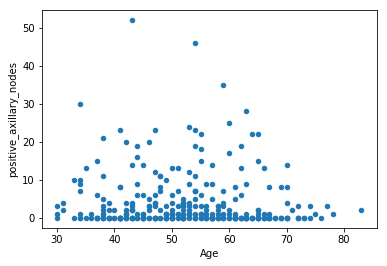

In [15]:
#2-D scatter plot:
#ALWAYS understand the axis: labels and scale.

cancer.plot(kind='scatter', x='Age', y='positive_axillary_nodes') ;
plt.show()

#cannot make much sense out it. 
#What if we color the points by thier class-label/flower-type.

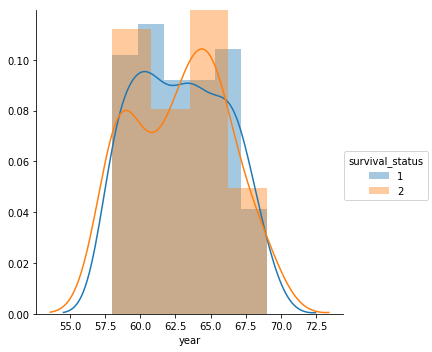

In [23]:
sns.FacetGrid(cancer,hue="survival_status",size=5)\
    .map(sns.distplot,"year")\
    .add_legend()
plt.show()

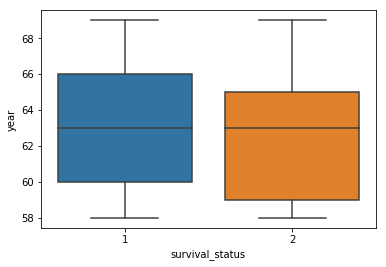

In [25]:
sns.boxplot(x = 'survival_status',y = 'year',data = cancer)
plt.show()

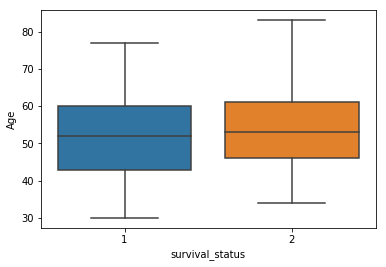

In [26]:
sns.boxplot(x = 'survival_status',y = 'Age',data = cancer)
plt.show()

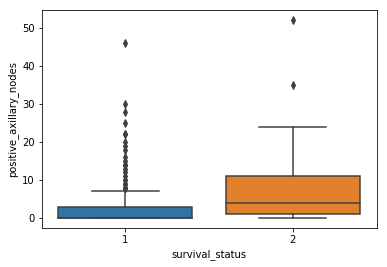

In [36]:
sns.boxplot(x = 'survival_status',y = 'positive_axillary_nodes',data = cancer)
plt.show()

Pair-Plots

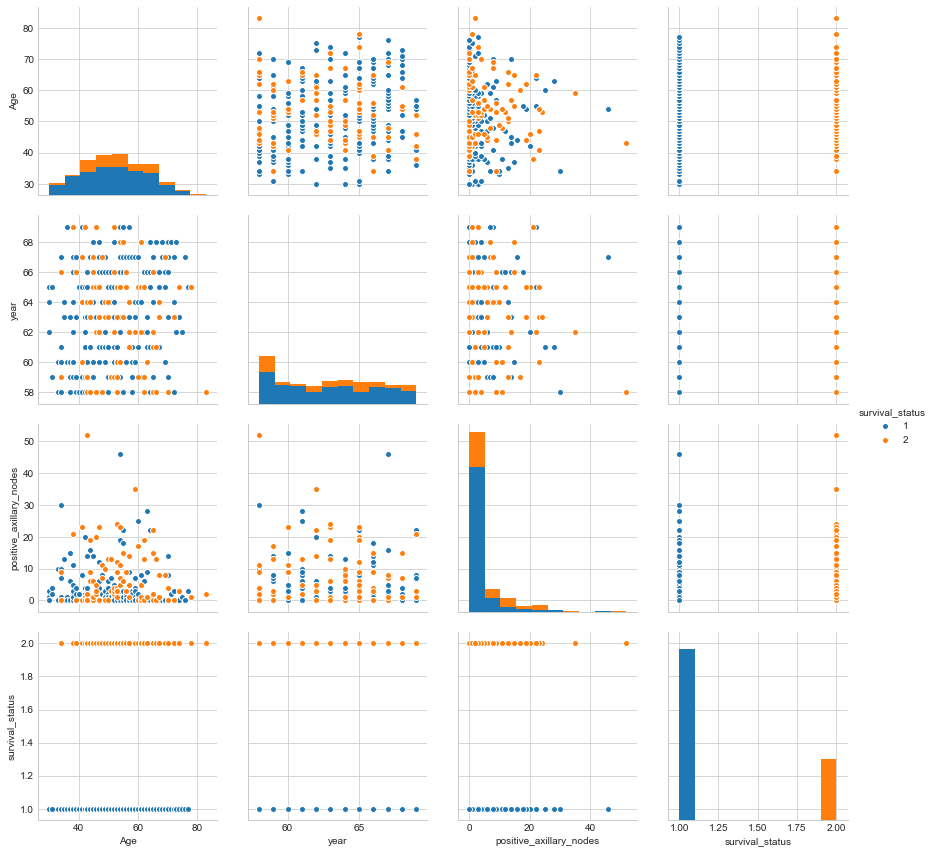

In [37]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(cancer,hue="survival_status",size=3)
plt.show()

Positive_axillary_nodes is a useful feature to identify the survival_status of cancer patients
Age and Year of operation have overlapping curves so we can't have a suitable observation that can classify survival_status

# Mean

In [42]:
#cancer is the name of the data frame
less_five = cancer[cancer['survival_status']==2]
more_five = cancer[cancer['survival_status']==1]



In [43]:
print(np.mean(less_five))

Age                        53.679012
year                       62.827160
positive_axillary_nodes     7.456790
survival_status             2.000000
dtype: float64


In [44]:
print(np.mean(more_five))

Age                        52.017778
year                       62.862222
positive_axillary_nodes     2.791111
survival_status             1.000000
dtype: float64


Mean age of patients who survived more than 5 years is 52 years and who didn't survive is 54 years
Those having more than 3 positive_axillary_nodes they have not survived more than 5 years
Those having less than 3 positive_axillary_nodes they have survived more than 5 years after the operation

In [45]:
cancer.head()

,Age,year,positive_axillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [46]:
dataset = pd.read_csv('haberman.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 3].values

In [47]:
y

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,

In [48]:
X

array([[30, 64,  1],
       [30, 62,  3],
       [30, 65,  0],
       [31, 59,  2],
       [31, 65,  4],
       [33, 58, 10],
       [33, 60,  0],
       [34, 59,  0],
       [34, 66,  9],
       [34, 58, 30],
       [34, 60,  1],
       [34, 61, 10],
       [34, 67,  7],
       [34, 60,  0],
       [35, 64, 13],
       [35, 63,  0],
       [36, 60,  1],
       [36, 69,  0],
       [37, 60,  0],
       [37, 63,  0],
       [37, 58,  0],
       [37, 59,  6],
       [37, 60, 15],
       [37, 63,  0],
       [38, 69, 21],
       [38, 59,  2],
       [38, 60,  0],
       [38, 60,  0],
       [38, 62,  3],
       [38, 64,  1],
       [38, 66,  0],
       [38, 66, 11],
       [38, 60,  1],
       [38, 67,  5],
       [39, 66,  0],
       [39, 63,  0],
       [39, 67,  0],
       [39, 58,  0],
       [39, 59,  2],
       [39, 63,  4],
       [40, 58,  2],
       [40, 58,  0],
       [40, 65,  0],
       [41, 60, 23],
       [41, 64,  0],
       [41, 67,  0],
       [41, 58,  0],
       [41, 5

In [49]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

C:\Users\heman\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [50]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\heman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [51]:
# Statistical Machine Learning approach
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test) 

In [52]:
# Making the Confusion Matrix for RandomForestClassifier 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_rfc)
cm

array([[33,  4],
       [18,  7]], dtype=int64)

In [53]:
# Model Evaluation for RandomForestClassifier
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_rfc))

             precision    recall  f1-score   support

          1       0.65      0.89      0.75        37
          2       0.64      0.28      0.39        25

avg / total       0.64      0.65      0.60        62



In [54]:
# Accuracy evaluation
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test, pred_rfc)
cm

0.6451612903225806

# Logestic Regression model

In [55]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
pred_classifier = classifier.predict(X_test) 

In [57]:
# Making the Confusion Matrix for RandomForestClassifier 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_rfc)
cm

array([[33,  4],
       [18,  7]], dtype=int64)

In [58]:
# Accuracy evaluation
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test, pred_rfc)
cm

0.6451612903225806